In [181]:
import pandas as pd
import ewtpy
import pywt
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers

      name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  humidity   precip  precipprob  precipcover preciptype  snow  snowdepth  windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  uvindex  severerisk              sunrise               sunset  moonphase              conditions                                                                 description               icon                                                     stations
0    Hanoi    5/1/2021     29.0     23.0  25.5          32.0          23.0       26.5  22.6      84.2    0.146         100         8.33       rain   NaN        NaN       NaN       14.8    117.6            1011.5        67.5         8.6           172.8         14.8        6         NaN  2021-05-01T05:26:14  2021-05-01T18:21:27       0.64  Rain, Partially cloudy                                 Partly cloudy throughout the day with rain.               rain         48820099999,488

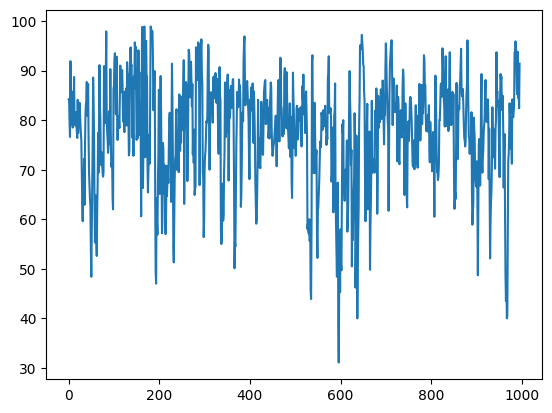

In [182]:
df = pd.read_csv('data_day.csv')
print(df.to_string())
data = df.to_numpy()
temp = df['temp'].to_numpy()
temp_max = df['tempmax'].to_numpy()
temp_min = df['tempmin'].to_numpy()
humidity = df['humidity'].to_numpy()
windspeed = df['windspeed'].to_numpy()
solar_radiation = df['solarradiation'].to_numpy()
precipitation = df['precip'].to_numpy()
dew = df['dew'].to_numpy()
precipcover = df['precipcover'].to_numpy()
winddir = df['winddir'].to_numpy()
solarenergy = df['solarenergy'].to_numpy()
training_set = np.array([temp_max, temp_min ,solar_radiation, precipitation, windspeed])
NUM = 0
plt.plot(humidity)

In [183]:

training_set_tp = training_set.transpose()

In [184]:
X = training_set_tp
y = np.array([humidity]).transpose()
print(X.shape)
print(y.shape)


(996, 5)
(996, 1)


In [185]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)
save = y_test
y_train = np.array([y_train[i + NUM] for i in range(len(y_train) - NUM)])
y_test = np.array([y_test[i + NUM] for i in range(len(y_test) - NUM)])

In [186]:
# model = Sequential(
#     [
#         tf.keras.Input(shape=(5,)),
#         tf.keras.layers.Dense(units = 25, activation = "relu"),
#         tf.keras.layers.Dense(units = 15, activation = "relu"),
#         tf.keras.layers.Dense(units = 5, activation = "relu"),
#         tf.keras.layers.Dense(units = 1, activation = "linear")
#         ### END CODE HERE ### 
#     ], name = "mlpnn_model" 
# ) 
# model.compile(
#     loss=tf.keras.losses.MeanSquaredError(),
#     optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
# )
# if (NUM != 0):
#     X_train = X_train[:-NUM]
# else:
#     X_train = X_train[:]
# print(X_train.shape)
# # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# hist_mlpnn = model.fit(
#     X_train,y_train,
#     epochs=1000,  
#     # callbacks = [callback] 
# ) 

In [187]:
model = Sequential(
    [
        tf.keras.Input(shape=(5,)),
        tf.keras.layers.Dense(units = 1000, activation = "relu",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        tf.keras.layers.Dense(units = 1, activation = "linear")
        ### END CODE HERE ### 
    ], name = "elm_model" 
) 
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
)
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
if (NUM != 0):
    X_train = X_train[:-NUM]
else:
    X_train = X_train[:]
hist_elm = model.fit(
    X_train,y_train,
    epochs=500,   
    # callbacks = [callback]
) 


Epoch 1/500


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3342.9897   
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 817.7908 
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 525.2106 
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 398.7902 
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 298.2985 
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250.4784 
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253.7628 
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 248.1850 
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 279.5556 
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243.3696 
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258.2776 
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.6284 
Epoch 13/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249.5990 
Epoch 14/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259.2886 
Epoch 15/500
22/22 ━━━━━━━━━━━━━━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
predict: 78.19654083251953, test: 82.1
predict: 85.75053405761719, test: 81.0
predict: 90.8333511352539, test: 90.4
predict: 91.96319580078125, test: 95.5
predict: 87.21414947509766, test: 92.8
predict: 79.94715881347656, test: 86.9
predict: 79.57675170898438, test: 84.0
predict: 79.50738525390625, test: 80.0
predict: 82.00544738769531, test: 78.5
predict: 90.50391387939453, test: 61.7
predict: 80.58055877685547, test: 72.5
predict: 87.93885803222656, test: 85.6
predict: 87.52010345458984, test: 91.3
predict: 86.79312896728516, test: 92.9
predict: 91.2000961303711, test: 94.4
predict: 94.46817016601562, test: 96.1
predict: 95.0943832397461, test: 96.1
predict: 91.69171142578125, test: 86.9
predict: 77.53311157226562, test: 79.0
predict: 80.93690490722656, test: 86.5
predict: 82.35450744628906, test: 88.4
predict: 81.54950714111328, test: 82.2
predict: 83.08660125732422, test: 82.2
predict: 82.0406494140625, 

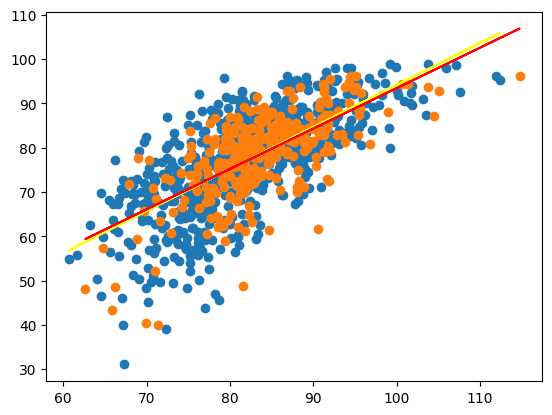

In [188]:
yt_predict = model.predict(X_train)
y_predict = model.predict(X_test)
if (NUM != 0):
    y_predict = y_predict[:-NUM]
    # yt_predict = yt_predict[:-NUM]
plt.scatter(yt_predict[:,0],y_train[:,0])
plt.scatter(y_predict[:,0],y_test[:,0])
for i in range(len(y_predict) - NUM):
    print(f"predict: {y_predict[i,0]}, test: {y_test[i, 0]}")

print("TRAIN DETAIL")
print(f"R: {np.corrcoef(yt_predict[:,0],y_train[:,0])}")
print(f"RMSE: {mean_squared_error(y_train[:,0],yt_predict[:,0])**(1/2)}")
print(f"MAE: {mean_absolute_error(y_train[:,0],yt_predict[:,0])}")
# print(f"SCORE: {accuracy_score(y_train[:,0],yt_predict[:,0])}")
mt, bt = np.polyfit(yt_predict[:,0],y_train[:,0], 1)
plt.plot(yt_predict[:,0], mt*yt_predict[:,0]+bt, color = "yellow")
#add linear regression line to scatterplot 
print("TEST DETAIL")
print(f"R: {np.corrcoef(y_predict[:,0],y_test[:,0])}")
print(f"RMSE: {mean_squared_error(y_test[:,0],y_predict[:,0])**(1/2)}")
print(f"MAE: {mean_absolute_error(y_test[:,0],y_predict[:,0])}")
# print(f"SCORE: {accuracy_score(y_test[:,0],y_predict[:,0])}")
m, b = np.polyfit(y_predict[:,0],y_test[:,0], 1)
plt.plot(y_predict[:,0], m*y_predict[:,0]+b, color = "red")


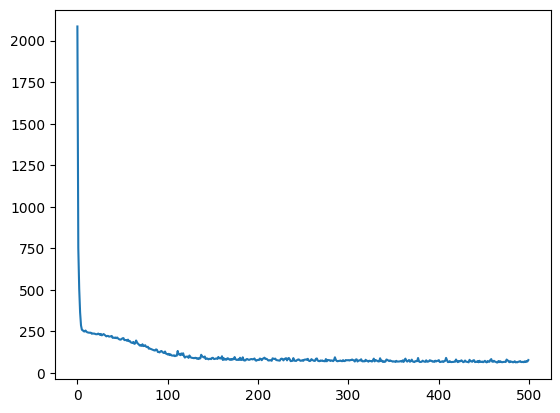

In [189]:
# plt.plot(history.history['loss'][200:500])
# print(history.history["loss"][400:500])
plt.plot(hist_elm.history['loss'][0:500])